# Python Essentials  



## 1. Why Python?  

Python is a [high-level language](https://en.wikipedia.org/wiki/High-level_programming_language) (as MATLAB or R) that is known to be a glue language because it can easily interact with other programming languages and their libraries (e.g., C, C++ or Fortran).  

### Strengths  

- There is a rich collection of existing libraries of classic numerical methods, plotting or data processing tools. We don’t need to reinvent the wheel and re-program a numerical integration for example, we can stand on the shoulders of giants!
- Several Integrated Development Environment (IDE) options: IPython, Spyder, Jupyter notebooks, Pycharm, Visual Studio Code...
- It is easy and fun to use! The Python ecosystem is huge and the community is very friendly.  
- It has a clean sytanx: "We code what we think"
- It is open-source and free! (not MATLAB).


### Cons  

- Since Python is an interpreted language (not a compiled one), the main criticism is its speed. However, most speed issues can be balanced out by using appropriate data structures and algorithms.  

## 2. As researchers we need...  

- Get, organise and/or model data.  
- Manipulate and process data.
- Visualise data.

### Python core libraries for getting things done  

- [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) for numerical computing of arrays.
- [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) for high-level routines as optimisation, interpolation, integration, differential equations, signal processing, etc.  
- [matplotlib](https://matplotlib.org/stable/gallery/index.html) for 2D visualisation.  

### A quick example  

Let's generate a time-domain periodic function with frequency = 4 Hz (using numpy):

$$
\sin 2\pi f t.
$$  

We will compute then the Discrete Fourier Transform (scipy) and plot the wave and its corresponding frequency spectrum.

In [ ]:
import numpy as np  
from matplotlib import pyplot as plt

#Frequency in terms of Hertz
freq  = 4 
#Sample rate
freq_samp = 20
t = np.linspace(0, 1, 2 * freq_samp, endpoint = False ) # here we are using numpy (as np)
a = np.sin(freq  * 2 * np.pi * t)
figure, axis = plt.subplots() # here we are using matplotlib pyplot (as plt)
axis.plot(t, a)
axis.plot(t, a, 'o')
axis.set_xlabel ('Time (s)')
axis.set_ylabel ('Signal amplitude')

print('t =', t)
print('a =', a)
plt.show()

In [ ]:
from scipy import fftpack

A = fftpack.fft(a) # here we are using scipy
frequency = fftpack.fftfreq(len(a)) * freq_samp
figure, axis = plt.subplots()

axis.stem(frequency, np.abs(A))
axis.set_xlabel('Frequency in Hz')
axis.set_ylabel('Frequency Spectrum Magnitude')
axis.set_xlim(-freq_samp / 2, freq_samp/ 2)
axis.set_ylim(-5, 110)
plt.show()

### Other packages... more specific

- [Mayavi](http://scipy-lectures.org/packages/3d_plotting/index.html#mayavi-label) for 3D visualisation.
- [pandas, statsmodels, seaborn](http://scipy-lectures.org/packages/statistics/index.html#statistics) for statistics.
- [sympy](http://scipy-lectures.org/packages/sympy.html#sympy) for symbolic computing.
- [scikit-learn](http://scipy-lectures.org/packages/scikit-learn/index.html#scikit-learn-chapter) for machine learning.
- [scikit-image](http://scipy-lectures.org/packages/scikit-image/index.html#scikit-image) for image processing.

## 3. The basics: Python objects (data types and structures)  

### Variables and types

To assign a value to a name, simply use the equals sign (=)

In [ ]:
my_name = 'Rosalind Franklin'
print("Hello and welcome to RMIT " + my_name + "!")

WATCH OUT!: Variables cannot start with numbers

In [ ]:
5km_run = 'sprint'

All variables are typed, i.e., Python use this differentiation to dictate their properties and how they are used.  

Here the well-known types: integers, floating-point numbers and strings are called *literal types*

In [ ]:
campus = 'RMIT Bundoora'
kangaroo_population = 50 # int type because it has only digits
student_population = 5
population_ratio = student_population/kangaroo_population # float type

print("Welcome to " + campus + "! Here you can find ", population_ratio, " students per kangaroo")

In [ ]:
type(campus)

In [ ]:
type(kangaroo_population) 

In [ ]:
type(population_ratio)

But there are other types:   

- Complex
- Bool
- bytes
- bytearray
- **list**
- **tuple**
- **set**
- **dictionary**
- frozenset
- none
- range  

This leads us to the next subject...

### Data structures: Essential containers

Python comes with built-in data structures or containers that allow to store and access data.  

These data structures are called **list, tuple, dictionary and set** and are used to *contain* many other variables.  

You can stick integers or floats or strings into these containers.

#### List: they are mutable

In [ ]:
a = [6, 28]
b = [1e3, -2, "I am in a list."]
c = [[1.0, 0.0], [0.0, 1.0]]

print(a)
print(b)
print(c)

In [ ]:
# Create an empty list
colours = []

colours.append("Green") # This is the append() method which adds single elements to the end of the list
colours.append("Blue")
colours.append("Red")

print("colours = ", colors)
print(colours[0])
print(colours[2])

In [ ]:
# Mutable, why?
colours[0] = "Black"
print(colours)

# some tricks to manipulate lists

add_ab = a + b
print(a+b)

repeat_colours = colours*3
print(repeat_colours)

[1,2,3]*4

#### Tuple: they are not mutable

In [ ]:
a_t = 1, 2, 5, 3 # length-4 tuple
b_t = (42,) # length-1 tuple, defined by comma

In [ ]:
# the same tricks to manipulate tuples

print(a_t+b_t)
a_t*4

In [ ]:
# they are not mutable
print(a_t[0])
a_t[0] = 365


In [ ]:
#  And we cannot use append() method neither
a_t.append(56)

#### Set: unordered container of unique values and cannot be indexed

In [ ]:
# a literal set formed with elements of various types
{1.0, 10, "one hundred", (1, 0, 0,0)}

# a literal set of special values
{True, False, None, "", 0.0, 0}

# conversion from a list to a set
print(set([2.0, 4, "eight", (16,)]))

# conversion from a string to set
set("Kangaroo") # HEY! Can you tell why we got this output!?

In [ ]:
s = {1,2,3}
t = {3,4,5}

Now try this  

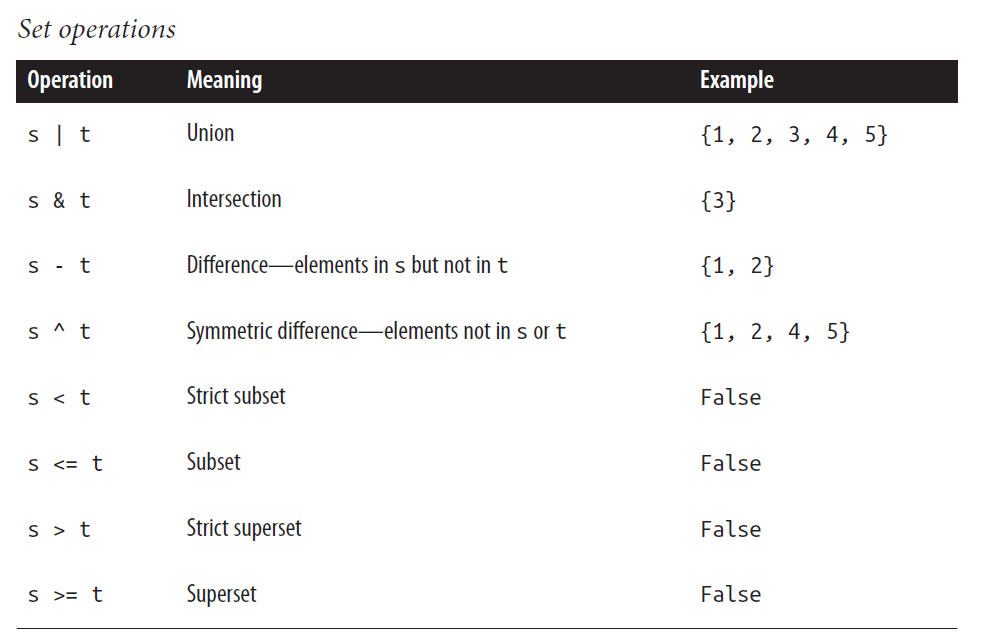

#### Dictionary: the most important data structure in Python. It is a mutable, unordered collection of unique key/value pairs

In [ ]:
# A dictionary on one line that stores Grace Hopper's information

grace = {"first": "Grace", "last": "Hopper", "birthday": [9, 12, 1906]}


# You can split up dicts onto many lines
constants = {
'pi': 3.14159,
"e": 2.718,
"h": 6.62606957e-34,
True: 1.0,
}

# A dict being formed from a list of (key, value) tuples
axes = dict([(1, "x"), (2, "y"), (3, "z")])

In [ ]:
constants['e']

In [ ]:
axes[3]

In [ ]:
grace['birthday']

In [ ]:
# They are mutable

constants[False] = 0.0
constants

In [ ]:
del axes[3]
axes

In [ ]:
grace['first'] = "Grace, a pioneer of computer programming"
grace

### Let's trace some curves and practice

Lissajous curves are described with the parametric equations  
$$
x(t)  = A\sin(at+\delta), \quad y(t) = B\sin(bt)
$$

The domain variable is $t$ and the appearance of the curve depends on the ratio $a/b$ and $\delta$.  

First, we need to load some modules to do the job

In [34]:
import numpy as np
import matplotlib.pyplot as plt

Next, let's generate the values for our domain  

In [35]:
t = np.linspace(-np.pi,np.pi,300) #300 points between [-pi,pi]
print(t) # t is now a list with 300 elements


[-3.14159265 -3.12057866 -3.09956466 -3.07855066 -3.05753666 -3.03652267
 -3.01550867 -2.99449467 -2.97348067 -2.95246667 -2.93145268 -2.91043868
 -2.88942468 -2.86841068 -2.84739669 -2.82638269 -2.80536869 -2.78435469
 -2.7633407  -2.7423267  -2.7213127  -2.7002987  -2.6792847  -2.65827071
 -2.63725671 -2.61624271 -2.59522871 -2.57421472 -2.55320072 -2.53218672
 -2.51117272 -2.49015873 -2.46914473 -2.44813073 -2.42711673 -2.40610273
 -2.38508874 -2.36407474 -2.34306074 -2.32204674 -2.30103275 -2.28001875
 -2.25900475 -2.23799075 -2.21697676 -2.19596276 -2.17494876 -2.15393476
 -2.13292076 -2.11190677 -2.09089277 -2.06987877 -2.04886477 -2.02785078
 -2.00683678 -1.98582278 -1.96480878 -1.94379479 -1.92278079 -1.90176679
 -1.88075279 -1.85973879 -1.8387248  -1.8177108  -1.7966968  -1.7756828
 -1.75466881 -1.73365481 -1.71264081 -1.69162681 -1.67061282 -1.64959882
 -1.62858482 -1.60757082 -1.58655683 -1.56554283 -1.54452883 -1.52351483
 -1.50250083 -1.48148684 -1.46047284 -1.43945884 -1.

We will plot 4 Lissajous curves by changing the ratio $a/b$ for a fixed $\delta$. $A, B = 1$. Thus,  

In [36]:
a = [3 ,4 ,5, 6]
b = [3, 9, 12, 15]
delta = np.pi/2

and arranging our curves in a $(2,2)$ array...

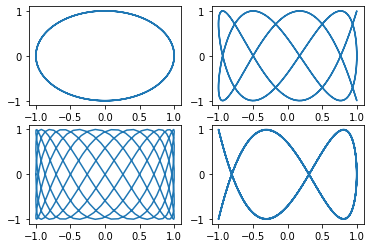

In [53]:
pos = 0
for i,j in zip(a,b):
    pos += 1
    x = np.sin(i*t+delta)
    y = np.sin(j*t)
    plt.subplot(2,2, pos) # (2,2) array. pos is the index indicating the position in the array
    plt.plot(x,y) # each graph has a ratio i/j where i,j correspond to the elements in the a,b lists
    
plt.show()